In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from shapely.geometry import Point
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [2]:
data=pd.read_csv(r"C:\\Users\\Firdevs Demirci\\Desktop\\turkey_earthquakes(1915-2021).csv",delimiter=';')

In [3]:
data=data.copy()

In [4]:
data.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021.01.01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2020.12.31,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020.12.30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020.12.30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020.12.27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [5]:
data.tail()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
17365,17366,1.915090e+13,1915.09.23,07:20:01.00,40.00,43.00,15.0,4.4,4.4,0.0,NaN,0.0,0.0,Ke,EVYAPAN-KAGIZMAN (KARS) [South West 5.8 km]
17366,17367,1.915050e+13,1915.05.19,04:48:02.40,37.62,39.47,10.0,5.5,5.3,5.3,5.5,5.4,5.3,Ke,CATLI-SIVEREK (SANLIURFA) [South East 3.5 km]
17367,17368,1.915040e+13,1915.04.01,05:41:05.00,40.50,44.50,35.0,4.9,4.8,4.8,4.9,4.8,4.9,Ke,AZERBAYCAN
17368,17369,1.915020e+13,1915.02.28,12:47:02.40,37.70,43.10,30.0,5.5,5.2,5.2,5.5,5.3,5.2,Ke,MEZRA-BEYTUSSEBAP (SIRNAK) [North West 9.0 km]
17369,17370,1.915020e+13,1915.02.14,08:20:00.60,38.80,42.50,30.0,5.7,5.4,5.4,5.7,5.6,5.4,Ke,CEMALETTIN-AHLAT (BITLIS) [South West 3.7 km]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           17370 non-null  int64  
 1   Deprem Kodu  17370 non-null  float64
 2   Olus tarihi  17370 non-null  object 
 3   Olus zamani  17370 non-null  object 
 4   Enlem        17370 non-null  float64
 5   Boylam       17370 non-null  float64
 6   Derinlik     17370 non-null  float64
 7   xM           17370 non-null  float64
 8   MD           17370 non-null  float64
 9   ML           17370 non-null  float64
 10  Mw           4645 non-null   float64
 11  Ms           17370 non-null  float64
 12  Mb           17370 non-null  float64
 13  Tip          17370 non-null  object 
 14  Yer          17370 non-null  object 
dtypes: float64(10), int64(1), object(4)
memory usage: 2.0+ MB


In [7]:
data.shape

(17370, 15)

In [8]:
data.columns

Index(['No', 'Deprem Kodu', 'Olus tarihi', 'Olus zamani', 'Enlem', 'Boylam',
       'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer'],
      dtype='object')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,17370.0,8.685500e+03,5.014431e+03,1.000000e+00,4.343250e+03,8.685500e+03,1.302775e+04,1.737000e+04
Deprem Kodu,17370.0,1.995628e+13,1.972321e+11,1.915020e+13,1.984040e+13,2.000010e+13,2.011100e+13,2.021010e+13
Enlem,17370.0,3.808733e+01,1.639449e+00,3.500000e+01,3.681000e+01,3.823000e+01,3.923000e+01,4.199820e+01
Boylam,17370.0,3.207730e+01,5.836045e+00,2.600000e+01,2.755000e+01,2.938050e+01,3.632308e+01,4.499920e+01
Derinlik,17370.0,1.555118e+01,2.143770e+01,0.000000e+00,5.000000e+00,9.000000e+00,1.500000e+01,1.990000e+02
xM,17370.0,3.982637e+00,5.424479e-01,3.500000e+00,3.600000e+00,3.800000e+00,4.200000e+00,7.900000e+00
MD,17370.0,1.939413e+00,2.014563e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.700000e+00,7.400000e+00
ML,17370.0,2.070961e+00,2.063218e+00,0.000000e+00,0.000000e+00,3.400000e+00,3.900000e+00,7.200000e+00
Mw,4645.0,4.178471e+00,1.056921e+00,0.000000e+00,3.700000e+00,4.200000e+00,4.800000e+00,7.700000e+00
Ms,17370.0,5.342487e-01,1.511660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.900000e+00


In [10]:
data.isnull().values.any()

True

In [11]:
data.isnull().sum()

No                 0
Deprem Kodu        0
Olus tarihi        0
Olus zamani        0
Enlem              0
Boylam             0
Derinlik           0
xM                 0
MD                 0
ML                 0
Mw             12725
Ms                 0
Mb                 0
Tip                0
Yer                0
dtype: int64

In [12]:
data=data.copy()

Eksik değerlerin veri setini ne kadar etkilediğini anlamak için kullanılır.(veri içindeki yüzdesini hesaplar)

In [13]:
eksik_yüzde=(data.isnull().sum()/len(data))*100
print(eksik_yüzde)

No              0.000000
Deprem Kodu     0.000000
Olus tarihi     0.000000
Olus zamani     0.000000
Enlem           0.000000
Boylam          0.000000
Derinlik        0.000000
xM              0.000000
MD              0.000000
ML              0.000000
Mw             73.258492
Ms              0.000000
Mb              0.000000
Tip             0.000000
Yer             0.000000
dtype: float64


Eksik değerlerin dağılımı

In [14]:
eksik_gözlemler=data[data.isnull().any(axis=1)]
eksik_gözlemler

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
2475,2476,2.015100e+13,2015.10.31,23:42:52.52,35.0135,26.6737,2.5,3.6,0.0,3.6,NaN,0.0,0.0,Ke,GIRIT ADASI ACIKLARI (AKDENIZ)
2478,2479,2.015100e+13,2015.10.28,14:30:06.19,39.4615,41.1892,2.2,3.6,0.0,3.6,NaN,0.0,0.0,Ke,YUVAKLI-TEKMAN (ERZURUM) [ 1.78 km]
2479,2480,2.015100e+13,2015.10.28,05:28:43.48,36.5207,28.9238,48.4,3.7,0.0,3.7,NaN,0.0,0.0,Ke,OLUDENIZ ACIKLARI-MUGLA (AKDENIZ)
2480,2481,2.015100e+13,2015.10.28,01:08:42.81,35.3468,27.0355,4.8,3.6,0.0,3.6,NaN,0.0,0.0,Ke,AKDENIZ
2481,2482,2.015100e+13,2015.10.27,01:59:55.96,35.0368,26.8127,9.6,3.5,0.0,3.3,NaN,0.0,0.0,Ke,GIRIT ADASI ACIKLARI (AKDENIZ)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17338,1.918110e+13,1918.11.29,09:57:01.00,36.4000,27.5000,15.0,4.3,4.3,0.0,NaN,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
17348,17349,1.918030e+13,1918.03.17,13:12:03.70,36.0000,28.0000,15.0,4.8,4.8,0.0,NaN,0.0,0.0,Ke,AKDENIZ
17354,17355,1.917060e+13,1917.06.04,01:13:03.30,37.0000,26.0000,5.0,4.7,4.7,0.0,NaN,0.0,0.0,Ke,AKDENIZ
17362,17363,1.916040e+13,1916.04.26,15:56:01.00,39.2000,27.0000,10.0,4.3,4.3,0.0,NaN,0.0,0.0,Ke,KAPLANKOY-BERGAMA (IZMIR) [South East 5.2 km]


In [15]:
mean_value=data['Mw'].mean()
data['Mw'].fillna(mean_value,inplace=True)

In [16]:
data.isnull().sum()

No             0
Deprem Kodu    0
Olus tarihi    0
Olus zamani    0
Enlem          0
Boylam         0
Derinlik       0
xM             0
MD             0
ML             0
Mw             0
Ms             0
Mb             0
Tip            0
Yer            0
dtype: int64

In [17]:
data.isnull().values.any()

False

In [18]:
data.columns

Index(['No', 'Deprem Kodu', 'Olus tarihi', 'Olus zamani', 'Enlem', 'Boylam',
       'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer'],
      dtype='object')

In [19]:
benzersiz_değerler=data['Tip'].unique()
print(benzersiz_değerler)

['Ke']


In [20]:
benzersiz_değerler=data['Yer'].unique()
print(benzersiz_değerler)

['RODOS ADASI (AKDENIZ)' 'EGE DENIZI' 'AKDENIZ' ...
 'CATLI-SIVEREK (SANLIURFA) [South East  3.5 km]'
 'MEZRA-BEYTUSSEBAP (SIRNAK) [North West  9.0 km]'
 'CEMALETTIN-AHLAT (BITLIS) [South West  3.7 km]']


In [21]:
data['Yer'].nunique()

10442

In [22]:
data['Enlem'].nunique()

6599

In [23]:
data["Derinlik"].min()

0.0

In [24]:
data["MD"].max()

7.4

In [25]:
data["MD"].min()

0.0

In [26]:
data["xM"].min()

3.5

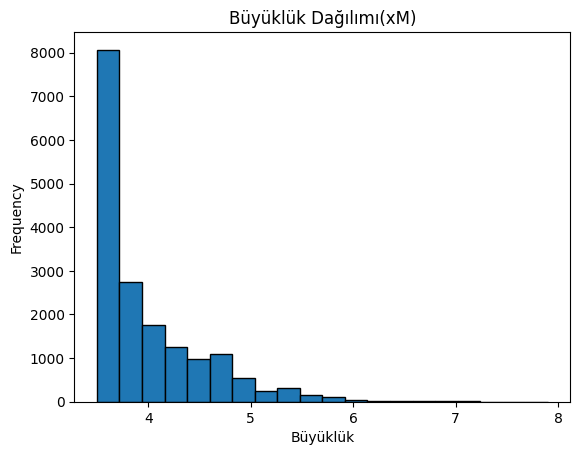

In [27]:
data['xM'].plot(kind='hist',bins=20,edgecolor='black')
plt.title('Büyüklük Dağılımı(xM)')
plt.xlabel('Büyüklük')
plt.show()

In [28]:
data=data.copy()

In [29]:
data['Olus tarihi']=pd.to_datetime(data['Olus tarihi'],format="%Y.%m.%d")

In [30]:
data['Olus tarihi']=[x.replace(year=2021,day=1,month=1)if x.day==31 else x for x in data['Olus tarihi']]
data.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021-01-01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2021-01-01,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020-12-30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020-12-30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020-12-27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [31]:
data['Olus tarihi']=pd.to_datetime(data['Olus tarihi'],format="%Y-%m-%d %H:%M:%S.%f")
data['Olus tarihi']=data['Olus tarihi'].apply(lambda x: x.strftime("%Y.%m.%d %H:%M:%S.%f"))

In [32]:
data.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021.01.01 00:00:00.000000,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2021.01.01 00:00:00.000000,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020.12.30 00:00:00.000000,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020.12.30 00:00:00.000000,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020.12.27 00:00:00.000000,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [33]:
data['Olus tarihi']=data['Olus tarihi'].apply(lambda x: x.split()[0])
data['Olus tarihi']=pd.to_datetime(data['Olus tarihi']). dt.strftime("%Y.%m.%d ")


In [34]:
data.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021.01.01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2021.01.01,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020.12.30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020.12.30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020.12.27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [35]:
data['Olus tarihi ve Zamani']=data['Olus tarihi']+' '+ data['Olus zamani']
data['Olus tarihi ve Zamani']=data['Olus tarihi ve Zamani'].apply(lambda x: x if int (x.split(':')[2].split('.')[0])<60 else x[:-5]+'59.00')
data['Olus tarihi ve Zamani']=pd.to_datetime(data['Olus tarihi ve Zamani'],format="%Y.%m.%d %H:%M:%S.%f")

In [36]:
data

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer,Olus tarihi ve Zamani
0,1,2.021010e+13,2021.01.01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.700000,0.0,0.0,Ke,RODOS ADASI (AKDENIZ),2021-01-01 16:36:21.410
1,2,2.020120e+13,2021.01.01,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.700000,0.0,0.0,Ke,EGE DENIZI,2021-01-01 00:51:27.940
2,3,2.020120e+13,2020.12.30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.900000,0.0,0.0,Ke,AKDENIZ,2020-12-30 18:45:12.790
3,4,2.020120e+13,2020.12.30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.300000,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ),2020-12-30 13:40:12.220
4,5,2.020120e+13,2020.12.27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.900000,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km],2020-12-27 20:08:36.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17365,17366,1.915090e+13,1915.09.23,07:20:01.00,40.0000,43.0000,15.0,4.4,4.4,0.0,4.178471,0.0,0.0,Ke,EVYAPAN-KAGIZMAN (KARS) [South West 5.8 km],1915-09-23 07:20:01.000
17366,17367,1.915050e+13,1915.05.19,04:48:02.40,37.6200,39.4700,10.0,5.5,5.3,5.3,5.500000,5.4,5.3,Ke,CATLI-SIVEREK (SANLIURFA) [South East 3.5 km],1915-05-19 04:48:02.400
17367,17368,1.915040e+13,1915.04.01,05:41:05.00,40.5000,44.5000,35.0,4.9,4.8,4.8,4.900000,4.8,4.9,Ke,AZERBAYCAN,1915-04-01 05:41:05.000
17368,17369,1.915020e+13,1915.02.28,12:47:02.40,37.7000,43.1000,30.0,5.5,5.2,5.2,5.500000,5.3,5.2,Ke,MEZRA-BEYTUSSEBAP (SIRNAK) [North West 9.0 km],1915-02-28 12:47:02.400


In [37]:
data=data.drop(['Olus tarihi','Olus zamani','No','Tip'],axis=1)

In [38]:
data

,Deprem Kodu,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Yer,Olus tarihi ve Zamani
0,2.021010e+13,35.9273,27.8658,26.1,3.9,0.0,3.9,3.700000,0.0,0.0,RODOS ADASI (AKDENIZ),2021-01-01 16:36:21.410
1,2.020120e+13,37.8435,26.7775,8.0,3.8,0.0,3.8,3.700000,0.0,0.0,EGE DENIZI,2021-01-01 00:51:27.940
2,2.020120e+13,36.4918,28.7092,5.0,3.9,0.0,3.7,3.900000,0.0,0.0,AKDENIZ,2020-12-30 18:45:12.790
3,2.020120e+13,37.7960,26.4165,14.4,4.4,0.0,4.4,4.300000,0.0,0.0,ONIKI ADALAR (AKDENIZ),2020-12-30 13:40:12.220
4,2.020120e+13,38.4172,39.1482,5.0,3.9,0.0,3.7,3.900000,0.0,0.0,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km],2020-12-27 20:08:36.880
...,...,...,...,...,...,...,...,...,...,...,...,...
17365,1.915090e+13,40.0000,43.0000,15.0,4.4,4.4,0.0,4.178471,0.0,0.0,EVYAPAN-KAGIZMAN (KARS) [South West 5.8 km],1915-09-23 07:20:01.000
17366,1.915050e+13,37.6200,39.4700,10.0,5.5,5.3,5.3,5.500000,5.4,5.3,CATLI-SIVEREK (SANLIURFA) [South East 3.5 km],1915-05-19 04:48:02.400
17367,1.915040e+13,40.5000,44.5000,35.0,4.9,4.8,4.8,4.900000,4.8,4.9,AZERBAYCAN,1915-04-01 05:41:05.000
17368,1.915020e+13,37.7000,43.1000,30.0,5.5,5.2,5.2,5.500000,5.3,5.2,MEZRA-BEYTUSSEBAP (SIRNAK) [North West 9.0 km],1915-02-28 12:47:02.400


In [39]:
column_order=['Olus tarihi ve Zamani'] +[i for i in data.columns if i !='Olus tarihi ve Zamani']
data=data[column_order]
data 

,Olus tarihi ve Zamani,Deprem Kodu,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Yer
0,2021-01-01 16:36:21.410,2.021010e+13,35.9273,27.8658,26.1,3.9,0.0,3.9,3.700000,0.0,0.0,RODOS ADASI (AKDENIZ)
1,2021-01-01 00:51:27.940,2.020120e+13,37.8435,26.7775,8.0,3.8,0.0,3.8,3.700000,0.0,0.0,EGE DENIZI
2,2020-12-30 18:45:12.790,2.020120e+13,36.4918,28.7092,5.0,3.9,0.0,3.7,3.900000,0.0,0.0,AKDENIZ
3,2020-12-30 13:40:12.220,2.020120e+13,37.7960,26.4165,14.4,4.4,0.0,4.4,4.300000,0.0,0.0,ONIKI ADALAR (AKDENIZ)
4,2020-12-27 20:08:36.880,2.020120e+13,38.4172,39.1482,5.0,3.9,0.0,3.7,3.900000,0.0,0.0,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]
...,...,...,...,...,...,...,...,...,...,...,...,...
17365,1915-09-23 07:20:01.000,1.915090e+13,40.0000,43.0000,15.0,4.4,4.4,0.0,4.178471,0.0,0.0,EVYAPAN-KAGIZMAN (KARS) [South West 5.8 km]
17366,1915-05-19 04:48:02.400,1.915050e+13,37.6200,39.4700,10.0,5.5,5.3,5.3,5.500000,5.4,5.3,CATLI-SIVEREK (SANLIURFA) [South East 3.5 km]
17367,1915-04-01 05:41:05.000,1.915040e+13,40.5000,44.5000,35.0,4.9,4.8,4.8,4.900000,4.8,4.9,AZERBAYCAN
17368,1915-02-28 12:47:02.400,1.915020e+13,37.7000,43.1000,30.0,5.5,5.2,5.2,5.500000,5.3,5.2,MEZRA-BEYTUSSEBAP (SIRNAK) [North West 9.0 km]


In [40]:
data['Yer'][4157]

'VAN G?L?'

Hatalı Yerler

In [41]:
print(data['Yer'].to_list())

['RODOS ADASI (AKDENIZ)', 'EGE DENIZI', 'AKDENIZ', 'ONIKI ADALAR (AKDENIZ)', 'KAVAKKOY-SIVRICE (ELAZIG) [South West  0.5 km]', 'AKDENIZ', 'KAVAKTEPE- (ELAZIG) [South East  1.6 km]', 'KAVAKTEPE- (ELAZIG) [North East  2.3 km]', 'KORULU-CATAK (VAN) [East 2.0 km]', 'AKDENIZ', 'DAGKARAAGAC-GERMENCIK (AYDIN) [South 1.4 km]', 'SURIYE', 'AYDEMIR-BASKALE (VAN) [North 2.0 km]', 'ARICILAR-ULA (MUGLA) [North West  2.4 km]', 'ETLER-SERIK (ANTALYA) [South East  3.7 km]', 'AKDENIZ', 'AKDENIZ', 'AKDENIZ', 'AKDENIZ', 'ERMISLER- (VAN) [South 0.9 km]', 'MILLI PARK-KUSADASI (AYDIN) [North East  1.2 km]', 'TASKOPRU-MUSTAFAKEMALPASA (BURSA) [South West  0.7 km]', 'AKDENIZ', 'UCDAM-UGURLUDAG (CORUM) [South West  0.7 km]', 'KUSADASI KORFEZI (EGE DENIZI)', 'KUSADASI KORFEZI (EGE DENIZI)', 'AKCAKERTIL-KEPSUT (BALIKESIR) [South West  1.7 km]', 'KUCUKCERIT-CAGLAYANCERIT (KAHRAMANMARAS) [North 3.0 km]', 'AKDENIZ', 'AKDENIZ', 'EGE DENIZI', 'ALANYALI-TOROSLAR (MERSIN) [North East  3.1 km]', 'AKDENIZ', 'SISAM ADASI (

In [42]:
Düzeltilerler= {"?ORUM": "CORUM", "K?TAHYA": "KUTAHYA", "EGE DENiZi": "EGE DENIZI",
              "DiYARBAKIR": "DIYARBAKIR", "T?RKiYE-iRAN SINIR B?LGESi": "TURKIYE-IRAN SINIR BOLGESI",
              "BALIKESiR ": "BALIKESIR", "SiVAS": "SIVAS", "iZMiR": "IZMIR", "TUNCELi": "TUNCELI",
              "SURiYE": "SURIYE", "ESKiSEHiR": "ESKISEHIR", "DENiZLi": "DENIZLI", "BiTLiS": "BITLIS",
              "KiLiS": "KILIS", "VAN G?L?": "VAN GOLU", "?ANKIRI": "CANKIRI",
              "T?RKIYE-IRAN SINIR B?LGESI": "TURKIYE-IRAN SINIR BOLGESI", "MANiSA": "MANISA",
              "AKDENiZ": "AKDENIZ", "G?RCiSTAN": "GURCISTAN", "BiNGOL": "BINGOL", "OSMANiYE": "OSMANIYE",
              "KIRSEHiR": "KIRSEHIR", "MARMARA DENiZi": "MARMARA DENIZI", "ERZiNCAN": "ERZINCAN",
              "BALIKESiR": "BALIKESIR", "GAZiANTEP": "GAZIANTEP", "G?RCISTAN": "GURCISTAN",
              "?ANAKKALE'": "CANAKKALE", "HAKKARi": "HAKKARI", "AFYONKARAHiSAR": "AFYONKARAHISAR",
              "BiLECiK": "BILECIK", "KAYSERi": "KAYSERI", "T?RKiYE-IRAK SINIR B?LGESi": "TURKIYE-IRAK SINIR BOLGESI",
              "KARADENiZ": "KARADENIZ", "T?RKIYE-IRAK SINIR B?LGESI": "TURKIYE-IRAK SINIR BOLGESI",
              "KARAB?K": "KARABUK", "KIBRIS-SADRAZAMK?Y?K": "KIBRIS-SADRAZAMKOY",
              "T?RKIYE-SURIYE SINIR B?LGESI?K": "TURKIYE-SURIYE SINIR BOLGESI", "?ANAKKALE": "CANAKKALE",
              "KIBRIS-SADRAZAMK?Y": "KIBRIS-SADRAZAMKOY", "ERZURUM ": "ERZURUM",
              "T?RKIYE-SURIYE SINIR B?LGESI": "TURKIYE-SURIYE SINIR BOLGESI", "ADANA ": "ADANA", "KUS G?L?": "KUS GOLU",
              "BURDUR ": "BURDUR", "KIBRIS-G?ZELYURT": "KIBRIS-GUZELYURT", "KONYA ": "KONYA",
              "KOCAELI ": "KOCAELI", "AMASYA ": "AMASYA", "KIRSEHIR ": "KIRSEHIR",
              "KIBRIS-KILI?ASLAN": "KIBRIS-KILICASLAN", "KIBRIS-Z?MR?TK?Y": "KIBRIS-ZUMRUTKOY",
              "DENIZLI ": "DENIZLI", "MANISA ": "MANISA", "ULUBAT G?L?": "ULUBAT GOLU",
              "T?RKIYE-ERMENISTAN SINIR B?LGESI": "TURKIYE-ERMENISTAN SINIR BOLGESI",
              "ERZINCAN ": "ERZINCAN", "TOKAT ": "TOKAT", "ARDAHAN ": "ARDAHAN"}
data['Yer'] = data['Yer'].replace(Düzeltilerler)
data['Yer'].head()


0                             RODOS ADASI (AKDENIZ)
1                                        EGE DENIZI
2                                           AKDENIZ
3                            ONIKI ADALAR (AKDENIZ)
4    KAVAKKOY-SIVRICE (ELAZIG) [South West  0.5 km]
Name: Yer, dtype: object

In [43]:
data['Yer'][4157]

'VAN GOLU'

In [44]:
import re 

In [45]:
data['Yer']=data['Yer'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if re.search(r'\((.*?)\)', x) else x)
print(data[['Yer']])

              Yer
0         AKDENIZ
1      EGE DENIZI
2         AKDENIZ
3         AKDENIZ
4          ELAZIG
...           ...
17365        KARS
17366   SANLIURFA
17367  AZERBAYCAN
17368      SIRNAK
17369      BITLIS

[17370 rows x 1 columns]


In [46]:
data.head()

,Olus tarihi ve Zamani,Deprem Kodu,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Yer
0,2021-01-01 16:36:21.410,2.021010e+13,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,AKDENIZ
1,2021-01-01 00:51:27.940,2.020120e+13,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,EGE DENIZI
2,2020-12-30 18:45:12.790,2.020120e+13,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,AKDENIZ
3,2020-12-30 13:40:12.220,2.020120e+13,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,AKDENIZ
4,2020-12-27 20:08:36.880,2.020120e+13,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,ELAZIG


In [47]:
df=pd.DataFrame(data)
df['Olus tarihi ve Zamani']=pd.to_datetime(df['Olus tarihi ve Zamani'])

In [48]:
data.set_index('Olus tarihi ve Zamani',inplace=True)
data

,Deprem Kodu,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Yer
Olus tarihi ve Zamani,,,,,,,,,,,
2021-01-01 16:36:21.410,2.021010e+13,35.9273,27.8658,26.1,3.9,0.0,3.9,3.700000,0.0,0.0,AKDENIZ
2021-01-01 00:51:27.940,2.020120e+13,37.8435,26.7775,8.0,3.8,0.0,3.8,3.700000,0.0,0.0,EGE DENIZI
2020-12-30 18:45:12.790,2.020120e+13,36.4918,28.7092,5.0,3.9,0.0,3.7,3.900000,0.0,0.0,AKDENIZ
2020-12-30 13:40:12.220,2.020120e+13,37.7960,26.4165,14.4,4.4,0.0,4.4,4.300000,0.0,0.0,AKDENIZ
2020-12-27 20:08:36.880,2.020120e+13,38.4172,39.1482,5.0,3.9,0.0,3.7,3.900000,0.0,0.0,ELAZIG
...,...,...,...,...,...,...,...,...,...,...,...
1915-09-23 07:20:01.000,1.915090e+13,40.0000,43.0000,15.0,4.4,4.4,0.0,4.178471,0.0,0.0,KARS
1915-05-19 04:48:02.400,1.915050e+13,37.6200,39.4700,10.0,5.5,5.3,5.3,5.500000,5.4,5.3,SANLIURFA
1915-04-01 05:41:05.000,1.915040e+13,40.5000,44.5000,35.0,4.9,4.8,4.8,4.900000,4.8,4.9,AZERBAYCAN


aylara göre gruplandırdık ve deprem sayısını hesapladık

In [49]:
aylik_deprem_sayilari=data.resample('M').size()

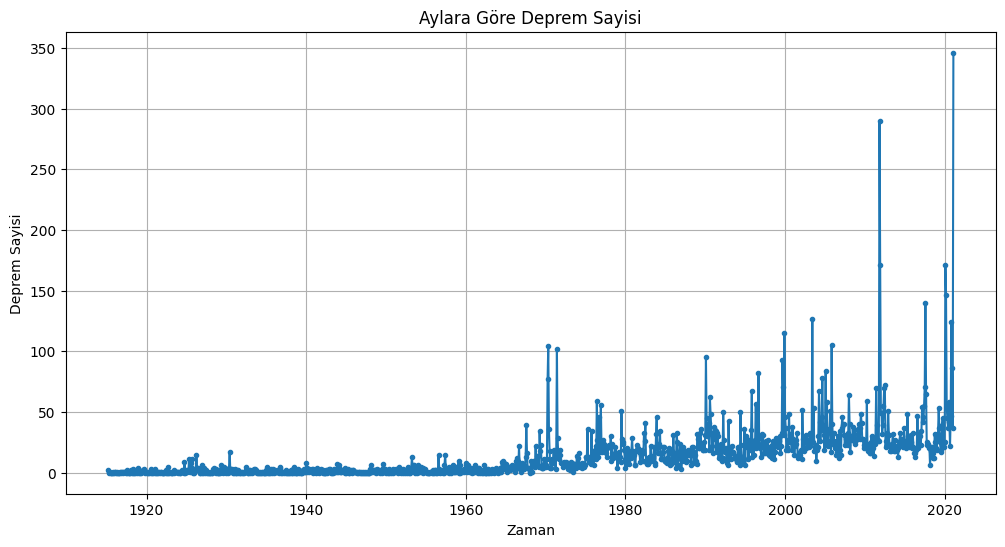

In [50]:
plt.figure(figsize=(12,6))
plt.plot(aylik_deprem_sayilari,marker='.')
plt.title('Aylara Göre Deprem Sayisi')
plt.xlabel('Zaman')
plt.ylabel('Deprem Sayisi')
plt.grid(True)
plt.show()

In [51]:
print(aylik_deprem_sayilari)

Olus tarihi ve Zamani
1915-02-28      2
1915-03-31      0
1915-04-30      1
1915-05-31      1
1915-06-30      0
             ... 
2020-09-30     47
2020-10-31    124
2020-11-30     86
2020-12-31     37
2021-01-31    346
Freq: M, Length: 1272, dtype: int64


Her yılın aralık aylarına göre hesaplanmıştır.

In [52]:
yillar_deprem_sayilari=data.resample('Y').size()

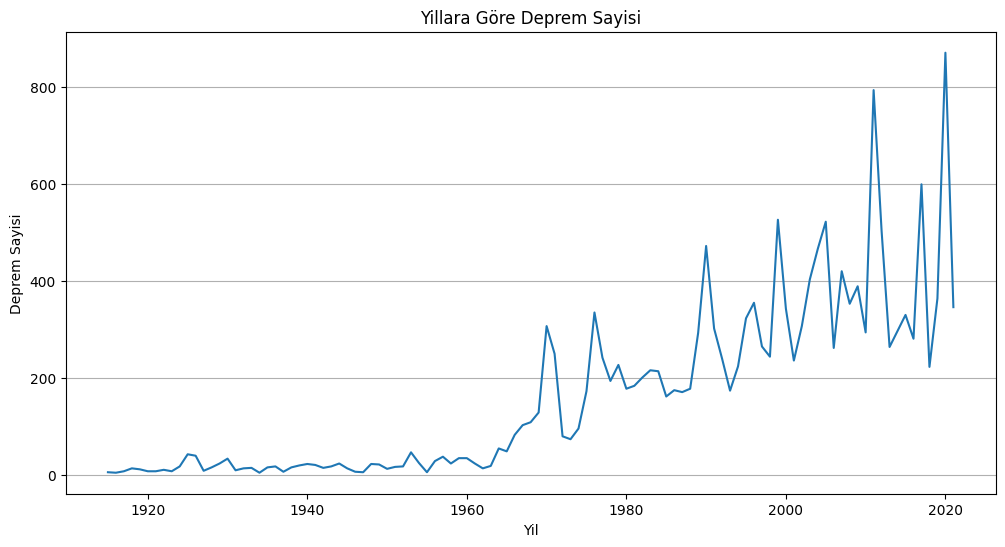

In [53]:
plt.figure(figsize=(12,6))
#Genişlik:12,Yükseklik:6
plt.plot(yillar_deprem_sayilari.index.year,yillar_deprem_sayilari)
plt.title('Yillara Göre Deprem Sayisi')
plt.xlabel('Yil')
plt.ylabel('Deprem Sayisi')
plt.grid(axis="y")
plt.show()

In [54]:
print(yillar_deprem_sayilari)

Olus tarihi ve Zamani
1915-12-31      6
1916-12-31      5
1917-12-31      8
1918-12-31     14
1919-12-31     12
             ... 
2017-12-31    599
2018-12-31    223
2019-12-31    364
2020-12-31    870
2021-12-31    346
Freq: A-DEC, Length: 107, dtype: int64


In [55]:
data.reset_index(inplace=True)
data.head()

,Olus tarihi ve Zamani,Deprem Kodu,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Yer
0,2021-01-01 16:36:21.410,2.021010e+13,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,AKDENIZ
1,2021-01-01 00:51:27.940,2.020120e+13,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,EGE DENIZI
2,2020-12-30 18:45:12.790,2.020120e+13,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,AKDENIZ
3,2020-12-30 13:40:12.220,2.020120e+13,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,AKDENIZ
4,2020-12-27 20:08:36.880,2.020120e+13,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,ELAZIG


In [56]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
pip install fiona

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
pip install shapely


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
df=pd.DataFrame(data)
geometry=[Point(lon,lat)for lon,lat in zip(data['Boylam'],data['Enlem'])]
geo_data=gpd.GeoDataFrame(data,geometry=geometry)

Türkiye haritasındaki deprem noktalarını görselleştirdik

In [61]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
turkey=world[world['name']=='Turkey']

C:\Users\Firdevs Demirci\AppData\Local\Temp\ipykernel_9536\3529750938.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


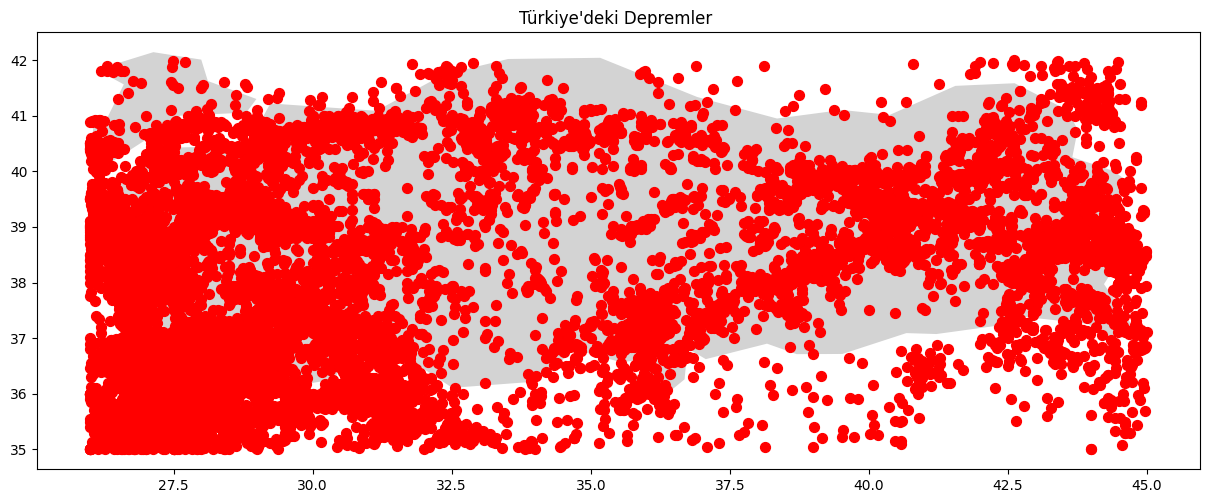

In [62]:
fig,ax=plt.subplots(figsize=(15,12))
turkey.plot(ax=ax,color='lightgray')
geo_data.plot(ax=ax,color='red',markersize=50)
plt.title('Türkiye\'deki Depremler ')
plt.show()

Derinlik ve Deprem Arasındaki İlişkinin Dağılım Grafiği

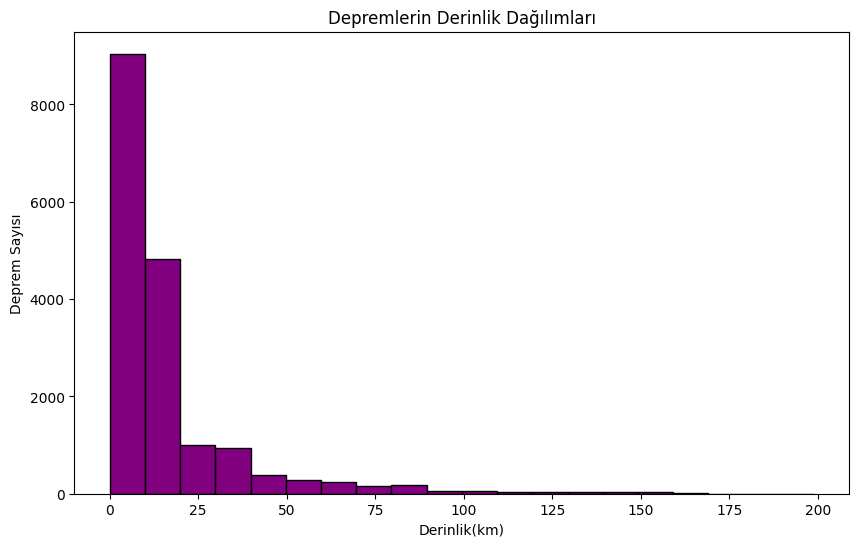

In [63]:
derinlik=data['Derinlik']
plt.figure(figsize=(10,6))
plt.hist(derinlik,bins=20,color='purple',edgecolor='black')
plt.title('Depremlerin Derinlik Dağılımları')
plt.xlabel('Derinlik(km)')
plt.ylabel('Deprem Sayısı')
plt.show()

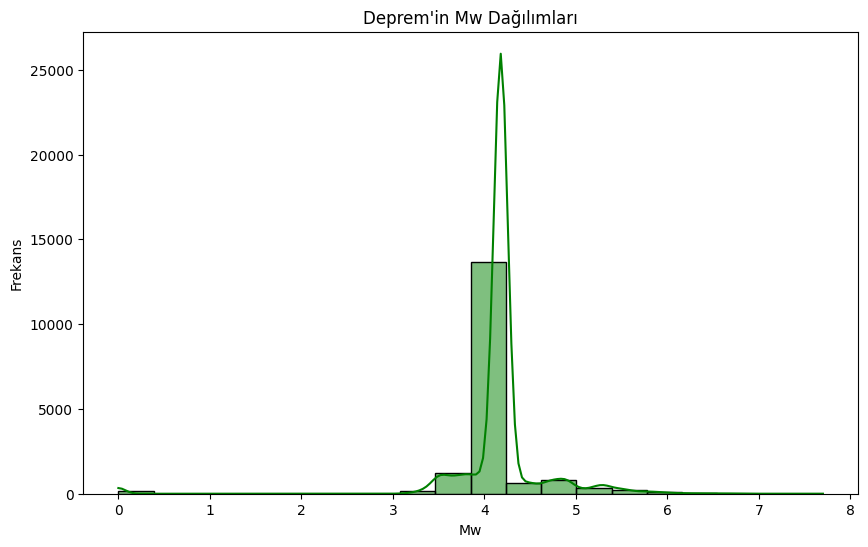

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(data['Mw'],bins=20,kde=True,color='green')
plt.title('Deprem\'in Mw Dağılımları')
plt.xlabel('Mw')
plt.ylabel('Frekans')
plt.show()

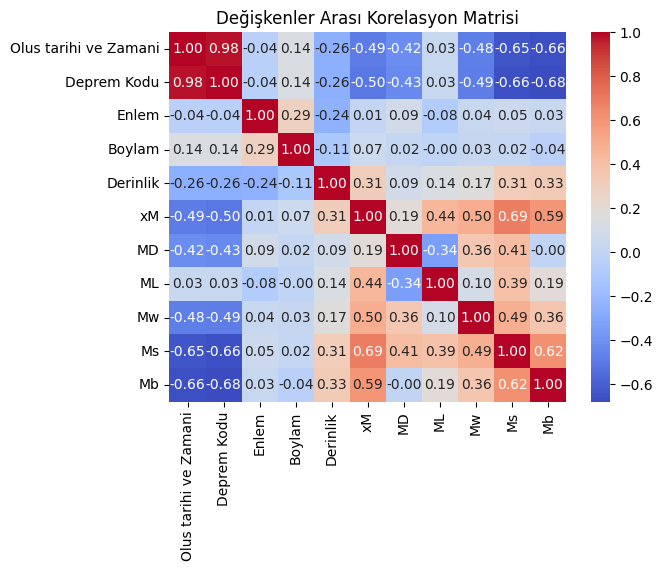

In [65]:
yer_sütunu=data['Yer']
data=data.drop('Yer',axis=1)
korelasyon_matrisi=data.corr()
data['Yer']=yer_sütunu
sns.heatmap(korelasyon_matrisi,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()


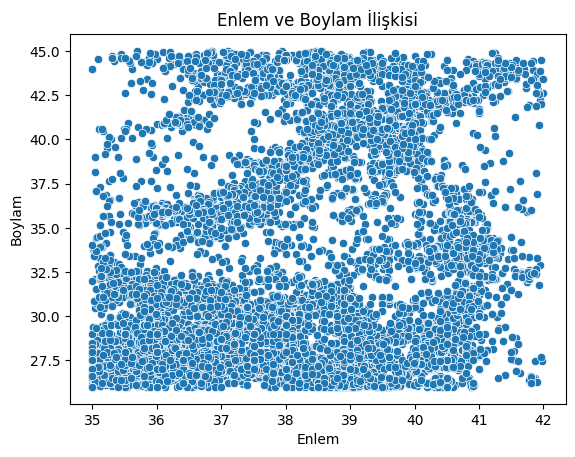

In [66]:
sns.scatterplot(x='Enlem',y='Boylam',data=data)
plt.title('Enlem ve Boylam İlişkisi')
plt.show()


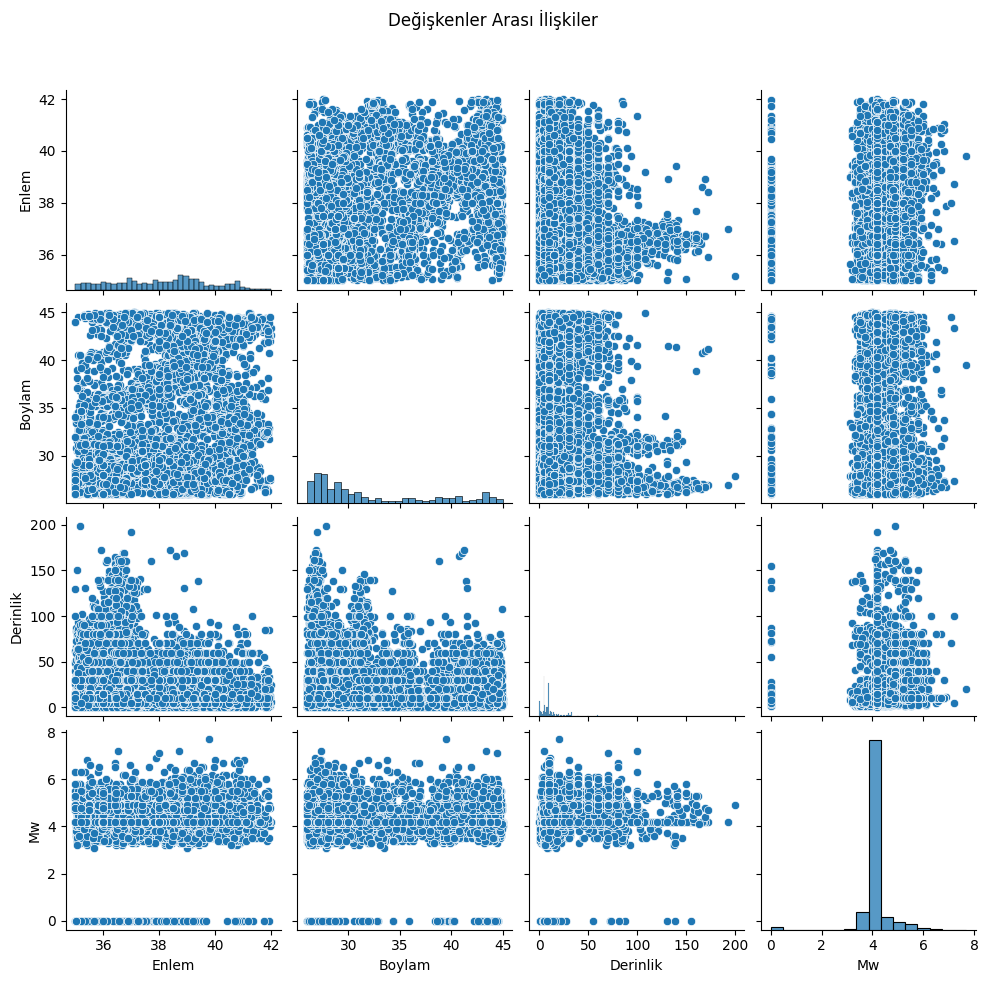

In [67]:
sns.pairplot(data[['Enlem','Boylam','Derinlik','Mw']])
plt.suptitle("Değişkenler Arası İlişkiler")
plt.subplots_adjust(top=0.9)
plt.show()

depremlerin etkisini tahmin eden basit bi model oluşturma

In [68]:
data = {
    'Olus Tarihi ve Zamani': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'Enlem': [36.5, 37.2, 35.8, 36.7, 37.0],
    'Boylam': [28.0, 29.1, 27.5, 28.8, 28.3],
    'Derinlik': [10, 8, 15, 12, 6],
    'xM': [6.0, 5.8, 7.2, 6.5, 5.5],
    'MD': [6.2, 5.9, 7.0, 6.3, 5.6],
    'ML': [5.8, 5.6, 6.8, 6.1, 5.2],
    'Mw': [6.1, 5.9, 7.1, 6.4, 5.6],
    'Ms': [6.0, 5.7, 6.9, 6.2, 5.4],
    'Mb': [5.9, 5.6, 6.8, 6.1, 5.3],
    'Impact_Score': [80, 75, 90, 85, 70]
}


df = pd.DataFrame(data)

df['Olus Tarihi ve Zamani'] = pd.to_datetime(df['Olus Tarihi ve Zamani'])

# Model için kullanılacak özellikler
features = ['Enlem', 'Boylam', 'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb']

X = df[features]
y = df['Impact_Score']
#veriyi eğitim ve test setlerine ayırın
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

#test seti üzerine tahmin 
y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error:{mse}')

Mean Squared Error:0.18987226498374365


In [69]:
comparison_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(comparison_df)

   Actual  Predicted
1      75  75.435743


In [70]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

    Feature  Coefficient
0     Enlem    -0.114086
1    Boylam     0.814223
2  Derinlik     3.268503
3        xM    -2.806068
4        MD     0.115334
5        ML    -0.799531
6        Mw    -1.323459
7        Ms    -0.205873
8        Mb    -0.479969


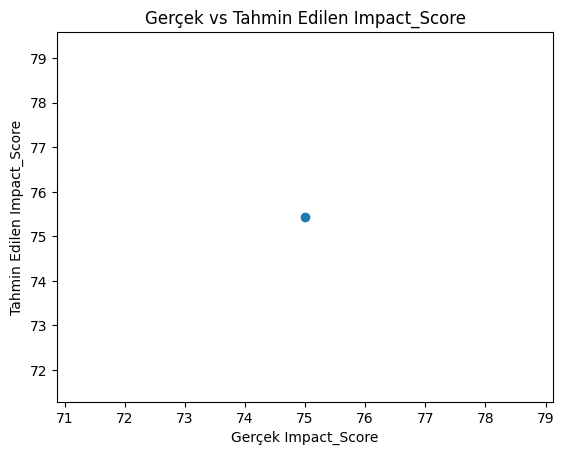

In [71]:
plt.scatter(y_test,y_pred)
plt.xlabel('Gerçek Impact_Score')
plt.ylabel('Tahmin Edilen Impact_Score')
plt.title('Gerçek vs Tahmin Edilen Impact_Score')
plt.show()

In [72]:
from sklearn.tree import DecisionTreeRegressor 

In [73]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [77]:
#Eksik verileri doldurma
imputer=SimpleImputer()
X_test_imputed=imputer.fit_transform(X_train)
X_test_imputed=imputer.transform(X_test)